# Steps Analysis for Barabasi-Albert networks
**Author**: Federica Imbriale  
**Description**: This notebook analyzes steps to convergence for Experiment 1.

**Python Version**: 3.11 

In [1]:
import pandas as pd 
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "/Users/fi3502phd/Desktop/SMS Data/Sim_dataframes/BasicProcessor" #where to locate csv file

In [3]:
sims = pd.read_csv(f"{path}/bigsimpleframe.csv")

/var/folders/qf/q6vl1wz11b59rfbgvvvygs0c0000gq/T/ipykernel_33886/1760801924.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  sims = pd.read_csv(f"{path}/bigsimpleframe.csv")


In [4]:
ba = sims[sims['network_kind'] == 'barabasialbert']

In [5]:
ba_steps = ba.groupby(['network_size', 'epsilon', 'trials', 'op','reliability', 'network_barabasialbert_attachments', 'action'])['steps'].describe()

In [6]:
ba_steps.to_csv(f"{path}/ba_steps.csv")

## TABLES

**Step stats for BALAGOYAL**

In [11]:
bg_steps = ba_steps.query("op == 'BalaGoyalOp' and epsilon == 0.001")

In [12]:
bg_steps

count  \
network_size epsilon trials op          reliability network_barabasialbert_attachments action          
32.0         0.001   64.0   BalaGoyalOp 1.0         1.0                                B       300.0   
                                                    2.0                                B       100.0   
                                                    4.0                                B       100.0   
                                                    8.0                                B       200.0   
                                                    16.0                               B       100.0   
64.0         0.001   64.0   BalaGoyalOp 1.0         1.0                                B        90.0   
                                                    2.0                                B        93.0   
                                                    4.0                                B        90.0   
                                                    8.0                                B        90.0   
                                                    16.0                               B        90.0   
                                                    32.0                               B        90.0   

                                                                                                       mean  \
network_size epsilon trials op          reliability network_barabasialbert_attachments action                 
32.0         0.001   64.0   BalaGoyalOp 1.0         1.0                                B       23518.560000   
                                                    2.0                                B       11545.000000   
                                                    4.0                                B        5972.090000   
                                                    8.0                                B        4009.140000   
                                                    16.0                               B        3363.580000   
64.0         0.001   64.0   BalaGoyalOp 1.0         1.0                                B       30218.244444   
                                                    2.0                                B       13423.290323   
                                                    4.0                                B        6491.944444   
                                                    8.0                                B        3677.400000   
                                                    16.0                               B        1881.355556   
                                                    32.0                               B        1568.044444   

                                                                                                        std  \
network_size epsilon trials op          reliability network_barabasialbert_attachments action                 
32.0         0.001   64.0   BalaGoyalOp 1.0         1.0                                B       10256.270235   
                                                    2.0                                B        4663.530877   
                                                    4.0                                B        2473.321939   
                                                    8.0                                B        3172.204493   
                                                    16.0                               B        3204.284891   
64.0         0.001   64.0   BalaGoyalOp 1.0         1.0                                B       10548.909785   
                                                    2.0                                B        4115.334203   
                                                    4.0                                B        1909.279559   
                                                    8.0                                B        1932.912612   
                                                    16.0                     

**Step stats for GULLIBLE-BINOMIAL**

In [14]:
gb_steps = ba_steps.query("op == 'UnreliableNetworkBasicGullibleBinomialOp' and epsilon == 0.001 and trials == 64 and action in ['B', 'A']")

In [17]:
gb64_steps = gb_steps.query("network_size == 64")
gb32_steps = gb_steps.query("network_size == 32")

A) SIZE 64

In [19]:
gb64_r75_steps = gb64_steps.query("reliability == 0.75").reset_index()
gb64_r75_steps

,network_size,epsilon,trials,op,reliability,network_barabasialbert_attachments,action,count,mean,std,min,25%,50%,75%,max
0,64.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.75,1.0,B,5.0,66516.600000,12761.624889,55047.0,58350.00,58350.0,80418.00,80418.0
1,64.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.75,2.0,B,58.0,40203.275862,26502.883454,13095.0,19984.00,31503.0,55392.00,98561.0
2,64.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.75,4.0,B,87.0,16330.839080,13934.434219,4878.0,9006.50,12276.0,19823.50,91933.0
3,64.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.75,8.0,B,90.0,5360.200000,2615.795972,2635.0,4193.25,5058.0,6151.25,25828.0
4,64.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.75,16.0,B,90.0,3301.600000,1891.523420,827.0,2258.00,2922.5,3902.50,11514.0
5,64.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.75,32.0,B,90.0,2385.788889,1910.406666,566.0,1348.25,1846.5,2611.00,11034.0


In [20]:
gb64_r50_steps = gb64_steps.query("reliability == 0.50").reset_index()
gb64_r50_steps

,network_size,epsilon,trials,op,reliability,network_barabasialbert_attachments,action,count,mean,std,min,25%,50%,75%,max
0,64.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.5,2.0,B,14.0,42933.714286,16534.030675,22094.0,31098.75,41721.0,48324.00,71017.0
1,64.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.5,4.0,B,44.0,36108.045455,23494.335758,5225.0,18413.25,25277.0,57378.75,93302.0
2,64.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.5,8.0,B,90.0,18749.211111,15851.009637,2688.0,9480.75,13545.5,20938.00,85414.0
3,64.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.5,16.0,B,90.0,6351.255556,4898.699671,852.0,3200.00,4769.0,7380.00,21887.0
4,64.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.5,32.0,A,1.0,2702.000000,NaN,2702.0,2702.00,2702.0,2702.00,2702.0
5,64.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.5,32.0,B,89.0,4581.494382,4911.293354,579.0,1911.00,2979.0,5548.00,32136.0


In [24]:
gb64_r25_steps = gb64_steps.query("reliability == 0.25").reset_index()
gb64_r25_steps

,network_size,epsilon,trials,op,reliability,network_barabasialbert_attachments,action,count,mean,std,min,25%,50%,75%,max
0,64.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.25,8.0,B,67.0,46141.761194,25896.720509,8040.0,23132.0,42420.0,68699.50,95236.0
1,64.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.25,16.0,A,1.0,4877.000000,NaN,4877.0,4877.0,4877.0,4877.00,4877.0
2,64.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.25,16.0,B,82.0,23873.195122,20269.244515,2754.0,8422.0,15976.0,35900.25,99455.0
3,64.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.25,32.0,A,5.0,4799.200000,2743.868382,2079.0,3328.0,3602.0,5977.00,9010.0
4,64.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.25,32.0,B,101.0,16552.950495,19055.737068,974.0,4092.0,9182.0,21938.00,87789.0


B) SIZE 32

In [30]:
gb32_r75_steps = gb32_steps.query("reliability == 0.75").reset_index()
gb32_r75_steps

,network_size,epsilon,trials,op,reliability,network_barabasialbert_attachments,action,count,mean,std,min,25%,50%,75%,max
0,32.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.75,1.0,B,32.0,39864.968750,21590.774926,15819.0,24355.75,34345.0,41884.0,79782.0
1,32.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.75,2.0,B,43.0,20977.302326,11248.639354,7485.0,15042.50,17055.0,25063.5,61469.0
2,32.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.75,4.0,A,1.0,1510.000000,NaN,1510.0,1510.00,1510.0,1510.0,1510.0
3,32.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.75,4.0,B,48.0,13388.770833,11099.876944,3828.0,7907.00,10579.5,14901.0,72549.0
4,32.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.75,8.0,B,49.0,5720.000000,5971.080842,1342.0,2979.00,4010.0,5995.0,36161.0
5,32.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.75,16.0,B,49.0,4874.510204,3722.692407,731.0,2761.00,4006.0,5577.0,23653.0


In [33]:
gb32_r50_steps = gb32_steps.query("reliability == 0.50").reset_index()
gb32_r50_steps

,network_size,epsilon,trials,op,reliability,network_barabasialbert_attachments,action,count,mean,std,min,25%,50%,75%,max
0,32.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.5,2.0,B,16.0,43865.312500,22769.464923,14970.0,26609.75,36248.0,60711.50,86972.0
1,32.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.5,4.0,B,120.0,27065.875000,18927.247112,4886.0,16051.75,23722.5,32448.25,95531.0
2,32.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.5,8.0,A,3.0,2411.666667,2725.359670,751.0,839.00,927.0,3242.00,5557.0
3,32.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.5,8.0,B,44.0,9780.227273,5987.340707,3330.0,5975.00,8414.0,11220.25,30905.0
4,32.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.5,16.0,B,46.0,10365.978261,7942.584761,1079.0,4784.25,8195.0,12599.00,35484.0


In [34]:
gb32_r25_steps = gb32_steps.query("reliability == 0.25").reset_index()
gb32_r25_steps

,network_size,epsilon,trials,op,reliability,network_barabasialbert_attachments,action,count,mean,std,min,25%,50%,75%,max
0,32.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.25,4.0,B,9.0,34348.222222,28672.174611,8770.0,14174.00,19474.0,67851.0,76883.0
1,32.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.25,8.0,A,8.0,13383.750000,14762.396948,2507.0,2798.75,7294.0,17879.0,36440.0
2,32.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.25,8.0,B,62.0,32412.322581,22970.209395,4175.0,14646.00,25887.0,46481.5,93428.0
3,32.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.25,16.0,A,16.0,3839.000000,2375.176400,761.0,2167.50,3305.0,5582.5,7251.0
4,32.0,0.001,64.0,UnreliableNetworkBasicGullibleBinomialOp,0.25,16.0,B,74.0,22111.810811,17934.878875,711.0,7263.00,19922.0,36617.0,65237.0


**Step stats for GULLIBLE - NEGATIVE EPSILON**

In [37]:
gneg_steps = ba_steps.query("op == 'UnreliableNetworkBasicGullibleNegativeEpsOp' and epsilon == 0.001 and trials == 64 and action in ['B', 'A']")

In [39]:
gneg64_steps = gneg_steps.query("network_size == 64")
gneg32_steps = gneg_steps.query("network_size == 32")

A) SIZE 64

In [44]:
gneg64_r75_steps = gneg64_steps.query("reliability == 0.75").reset_index()
gneg64_r75_steps

,network_size,epsilon,trials,op,reliability,network_barabasialbert_attachments,action,count,mean,std,min,25%,50%,75%,max
0,64.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.75,2.0,B,6.0,69662.000,0.000000,69662.0,69662.00,69662.0,69662.00,69662.0
1,64.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.75,4.0,B,8.0,44316.000,35143.784267,11442.0,11442.00,44316.0,77190.00,77190.0
2,64.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.75,8.0,B,60.0,32006.500,23545.880699,6023.0,12238.75,28676.5,41575.75,85880.0
3,64.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.75,16.0,B,80.0,13905.950,17905.069734,1567.0,3514.25,6773.0,18443.50,88858.0
4,64.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.75,32.0,B,96.0,5172.125,5596.083479,772.0,1960.75,3209.5,4728.25,24541.0


In [46]:
gneg64_r50_steps = gneg64_steps.query("reliability == 0.50").reset_index()
gneg64_r50_steps

,network_size,epsilon,trials,op,reliability,network_barabasialbert_attachments,action,count,mean,std,min,25%,50%,75%,max
0,64.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.5,4.0,A,2.0,17871.000000,0.000000,17871.0,17871.0,17871.0,17871.00,17871.0
1,64.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.5,8.0,A,2.0,9502.000000,1467.953678,8464.0,8983.0,9502.0,10021.00,10540.0
2,64.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.5,16.0,A,9.0,9669.222222,7576.464607,2157.0,7098.0,7110.0,9655.00,22319.0
3,64.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.5,16.0,B,2.0,45775.000000,0.000000,45775.0,45775.0,45775.0,45775.00,45775.0
4,64.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.5,32.0,A,8.0,11457.250000,13013.586271,1801.0,3452.5,5534.5,13754.50,39308.0
5,64.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.5,32.0,B,8.0,9254.500000,7435.582521,2861.0,3883.5,6686.5,11934.25,24605.0


In [47]:
gneg64_r25_steps = gneg64_steps.query("reliability == 0.25").reset_index()
gneg64_r25_steps

,network_size,epsilon,trials,op,reliability,network_barabasialbert_attachments,action,count,mean,std,min,25%,50%,75%,max
0,64.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.25,1.0,A,5.0,25311.400000,10906.681177,13732.0,16155.0,25963.0,30072.0,40635.0
1,64.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.25,2.0,A,7.0,17761.428571,14676.042085,8460.0,9394.0,10867.0,18276.0,49663.0
2,64.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.25,4.0,A,27.0,19750.518519,13377.830209,3814.0,9498.0,17273.0,27920.5,53780.0
3,64.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.25,8.0,A,42.0,16428.309524,9868.011796,6207.0,8768.5,12555.5,25139.0,37960.0
4,64.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.25,16.0,A,56.0,15375.160714,15057.948802,2689.0,5825.0,10863.5,17292.0,85652.0
5,64.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.25,32.0,A,61.0,16464.622951,14923.776214,1105.0,6238.0,12489.0,20330.0,62609.0


B) SIZE 32

In [51]:
gneg32_r75_steps = gneg32_steps.query("reliability == 0.75").reset_index()
gneg32_r75_steps

,network_size,epsilon,trials,op,reliability,network_barabasialbert_attachments,action,count,mean,std,min,25%,50%,75%,max
0,32.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.75,1.0,B,6.0,65243.166667,18818.354194,39404.0,58099.75,66664.0,66664.00,96818.0
1,32.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.75,2.0,B,9.0,27686.666667,22246.213498,13274.0,15441.00,21552.0,23168.00,85385.0
2,32.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.75,4.0,A,1.0,3466.000000,NaN,3466.0,3466.00,3466.0,3466.00,3466.0
3,32.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.75,4.0,B,38.0,20103.315789,20064.650166,3314.0,7679.00,14237.0,20784.50,86556.0
4,32.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.75,8.0,B,33.0,17501.242424,21069.725629,2472.0,4876.00,9716.0,21413.00,96027.0
5,32.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.75,16.0,A,2.0,2262.500000,993.485028,1560.0,1911.25,2262.5,2613.75,2965.0
6,32.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.75,16.0,B,40.0,8923.575000,12260.215813,1251.0,3558.75,4966.0,9545.00,62331.0


In [53]:
gneg32_r50_steps = gneg32_steps.query("reliability == 0.50").reset_index()
gneg32_r50_steps

,network_size,epsilon,trials,op,reliability,network_barabasialbert_attachments,action,count,mean,std,min,25%,50%,75%,max
0,32.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.5,1.0,A,3.0,40980.000000,28337.134241,18897.0,25004.00,31111.0,52021.50,72932.0
1,32.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.5,2.0,A,2.0,36489.500000,42052.347384,6754.0,21621.75,36489.5,51357.25,66225.0
2,32.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.5,4.0,A,10.0,18791.000000,26450.933434,1607.0,3912.75,6491.5,12823.00,68448.0
3,32.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.5,4.0,B,2.0,28419.000000,0.000000,28419.0,28419.00,28419.0,28419.00,28419.0
4,32.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.5,8.0,A,13.0,12395.923077,9299.337758,1465.0,6918.00,9145.0,16114.00,33988.0
5,32.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.5,8.0,B,3.0,15533.333333,10930.129292,8907.0,9225.50,9544.0,18846.50,28149.0
6,32.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.5,16.0,A,25.0,14529.240000,19521.462877,697.0,1255.00,3783.0,25360.00,58707.0
7,32.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.5,16.0,B,20.0,13650.850000,20339.402380,1672.0,3925.00,7640.0,18322.00,94930.0


In [54]:
gneg32_r25_steps = gneg32_steps.query("reliability == 0.25").reset_index()
gneg32_r25_steps

,network_size,epsilon,trials,op,reliability,network_barabasialbert_attachments,action,count,mean,std,min,25%,50%,75%,max
0,32.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.25,1.0,A,11.0,38894.636364,28946.201662,4967.0,14265.50,32435.0,61548.00,88588.0
1,32.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.25,2.0,A,38.0,20443.894737,15463.374700,3331.0,8728.75,15000.0,28728.00,64136.0
2,32.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.25,4.0,A,33.0,15560.333333,16033.250949,3259.0,6332.00,10876.0,17713.00,84955.0
3,32.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.25,8.0,A,37.0,15432.432432,21389.889750,1341.0,3003.00,8144.0,15137.00,84065.0
4,32.0,0.001,64.0,UnreliableNetworkBasicGullibleNegativeEpsOp,0.25,16.0,A,30.0,18782.700000,22689.316227,1096.0,5557.75,11166.0,20610.25,89493.0


**Step stats for ALIGNED - BINOMIAL**

A) SIZE 64

In [59]:
al_steps = ba_steps.query("op == 'UnreliableNetworkModifiedAlignedBinomialOp' and epsilon == 0.001 and trials == 64 and action in ['B', 'A']")

In [61]:
al_r75_steps = al_steps.query("reliability == 0.75").reset_index()
al_r75_steps

,network_size,epsilon,trials,op,reliability,network_barabasialbert_attachments,action,count,mean,std,min,25%,50%,75%,max
0,64.0,0.001,64.0,UnreliableNetworkModifiedAlignedBinomialOp,0.75,1.0,B,5.0,65790.000000,10366.041530,49339.0,67026.00,67199.0,67199.00,78187.0
1,64.0,0.001,64.0,UnreliableNetworkModifiedAlignedBinomialOp,0.75,2.0,B,65.0,52614.584615,19761.504956,19740.0,36015.00,56895.0,64663.00,94155.0
2,64.0,0.001,64.0,UnreliableNetworkModifiedAlignedBinomialOp,0.75,4.0,B,90.0,28560.977778,19753.058398,8139.0,14598.00,20054.0,35123.00,86241.0
3,64.0,0.001,64.0,UnreliableNetworkModifiedAlignedBinomialOp,0.75,8.0,B,105.0,9081.400000,5202.910348,3892.0,6544.00,8137.0,10322.00,34853.0
4,64.0,0.001,64.0,UnreliableNetworkModifiedAlignedBinomialOp,0.75,16.0,B,100.0,5179.350000,5873.885074,1271.0,2975.25,3785.0,5298.00,43031.0
5,64.0,0.001,64.0,UnreliableNetworkModifiedAlignedBinomialOp,0.75,32.0,B,100.0,3106.530000,1491.751878,932.0,2110.25,2837.0,3326.25,8767.0


In [63]:
al_r50_steps = al_steps.query("reliability == 0.50").reset_index()
al_r50_steps

,network_size,epsilon,trials,op,reliability,network_barabasialbert_attachments,action,count,mean,std,min,25%,50%,75%,max
0,64.0,0.001,64.0,UnreliableNetworkModifiedAlignedBinomialOp,0.5,4.0,B,4.0,53306.000000,0.000000,53306.0,53306.0,53306.0,53306.0,53306.0
1,64.0,0.001,64.0,UnreliableNetworkModifiedAlignedBinomialOp,0.5,8.0,B,8.0,47575.000000,31802.204142,13671.0,13671.0,48706.0,80725.0,80725.0
2,64.0,0.001,64.0,UnreliableNetworkModifiedAlignedBinomialOp,0.5,16.0,B,63.0,35903.000000,24816.316339,7684.0,19392.0,24679.0,69099.0,77805.0
3,64.0,0.001,64.0,UnreliableNetworkModifiedAlignedBinomialOp,0.5,32.0,A,7.0,3664.000000,0.000000,3664.0,3664.0,3664.0,3664.0,3664.0
4,64.0,0.001,64.0,UnreliableNetworkModifiedAlignedBinomialOp,0.5,32.0,B,81.0,24909.012346,25715.733221,2806.0,7292.0,16163.0,25371.0,89110.0


In [64]:
al_r25_steps = al_steps.query("reliability == 0.25").reset_index()
al_r25_steps

,network_size,epsilon,trials,op,reliability,network_barabasialbert_attachments,action,count,mean,std,min,25%,50%,75%,max


## VISUALIZATIONS 

A) SIZE 64 NETWORKS

In [69]:
bg = ba.query("op == 'BalaGoyalOp' and epsilon == 0.001 and network_size == 64 and action == 'B'").reset_index()

Text(0.5, 1.0, 'Speed of convergence to B for BalaGoyal size 64')

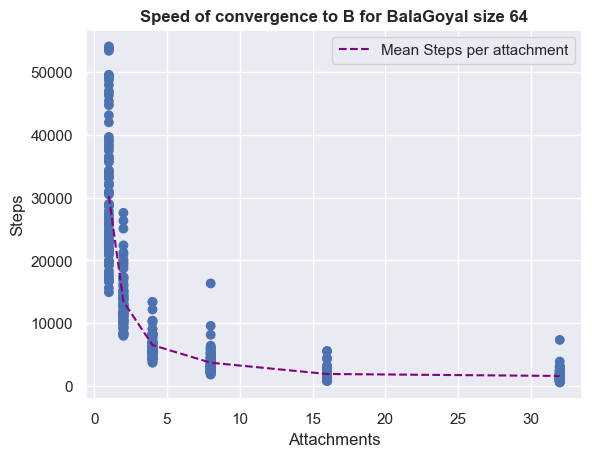

In [71]:
sns.set()
mean_steps = bg.groupby('network_barabasialbert_attachments')['steps'].mean()
sns.scatterplot(data = bg, x = 'network_barabasialbert_attachments', y = 'steps', edgecolor = 'none', s = 50)
# Add the mean line per group
plt.plot(mean_steps.index, mean_steps.values, color='purple', linestyle='--', label='Mean Steps per attachment')
plt.xlabel("Attachments", fontsize=12)  
plt.ylabel("Steps", fontsize=12) 
plt.legend() 
plt.title(f"Speed of convergence to B for BalaGoyal size 64", weight="bold")


In [133]:
gbin = ba.query("op == 'UnreliableNetworkBasicGullibleBinomialOp' and trials == 64 and epsilon == 0.001 and network_size == 64 and action != 'A'")

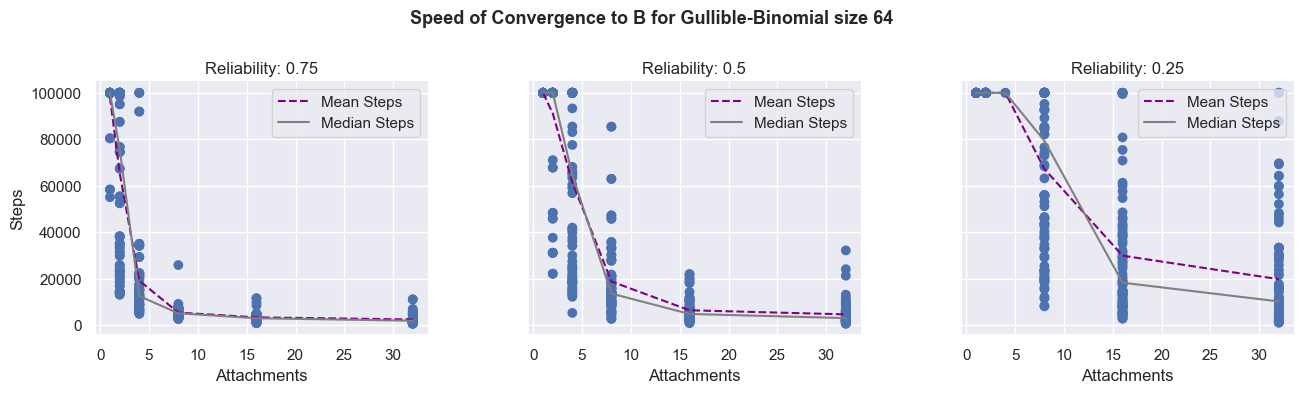

In [139]:
# Ensure reliability is sorted in descending order
reliability_order = gbin["reliability"].unique()
reliability_order = sorted(reliability_order, reverse=True)

# Set up the FacetGrid
sns.set()
g = sns.FacetGrid(
    data=gbin, 
    col="reliability", 
    col_wrap=3, 
    sharex=True, 
    sharey=True, 
    height=4, 
    aspect=1.1, 
    col_order=reliability_order
)

# Map the scatterplot to each FacetGrid subplot
g.map(sns.scatterplot, "network_barabasialbert_attachments", "steps", edgecolor='none', s=50)

# Loop through the axes in the FacetGrid and add mean and median lines
for ax in g.axes.flat:
    # Get the reliability value from the column title in the FacetGrid
    reliability_value = ax.get_title().split(" = ")[-1].strip()
    
    # Filter the data for the current reliability value
    data = gbin[gbin["reliability"] == float(reliability_value)]
    
    # Compute mean and median of 'steps' for each value of 'network_barabasialbert_attachments'
    mean_steps = data.groupby("network_barabasialbert_attachments")["steps"].mean()
    median_steps = data.groupby("network_barabasialbert_attachments")["steps"].median()
    
    # Plot the mean line (dashed purple)
    ax.plot(mean_steps.index, mean_steps.values, color="purple", linestyle="--", label="Mean Steps")
    
    # Plot the median line (solid green)
    ax.plot(median_steps.index, median_steps.values, color="grey", linestyle="-", label="Median Steps")
    
    # Add the legend to each subplot
    ax.legend()

# Set axis labels and subplot titles
g.set_axis_labels("Attachments", "Steps")
g.set_titles(col_template="Reliability: {col_name}")
plt.subplots_adjust(top=0.80, hspace=0.3, wspace=0.3)

# Add a global title
g.fig.suptitle("Speed of Convergence to B for Gullible-Binomial size 64", weight="bold", fontsize=13)

# Show the plot
plt.show()



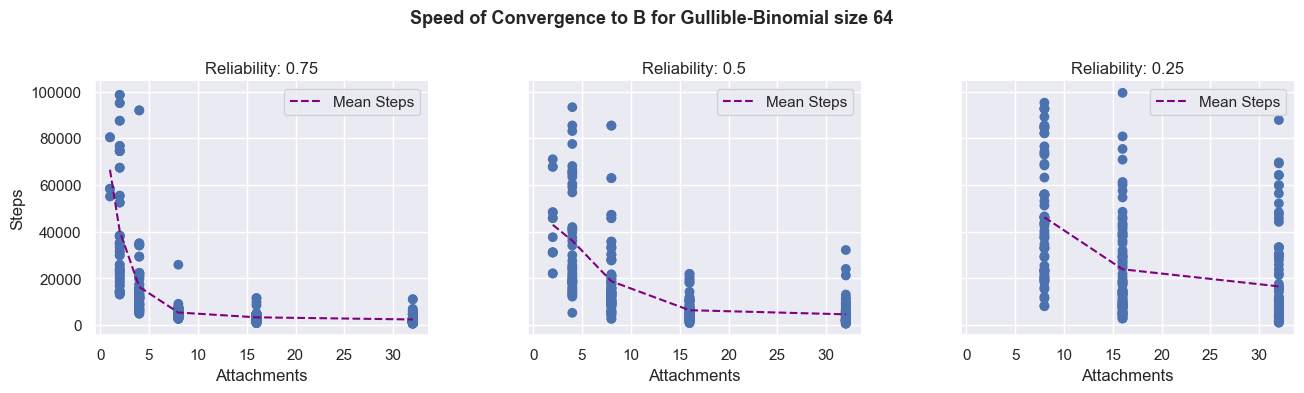

In [75]:
# Ensure reliability is sorted in descending order
reliability_order = gbin["reliability"].unique()
reliability_order = sorted(reliability_order, reverse=True)

# Set up the FacetGrid
sns.set()
g = sns.FacetGrid(
    data=gbin, 
    col="reliability", 
    col_wrap=3, 
    sharex=True, 
    sharey=True, 
    height=4, 
    aspect=1.1, 
    col_order=reliability_order
)

# Map the scatterplot to each FacetGrid subplot
g.map(sns.scatterplot, "network_barabasialbert_attachments", "steps", edgecolor='none', s=50)

# Loop through the axes in the FacetGrid and add mean lines
for ax in g.axes.flat:
    # Get the reliability value from the column title in the FacetGrid
    reliability_value = ax.get_title().split(" = ")[-1].strip()  # This should now work for the title format
    
    # Filter the data for the current reliability value
    data = gbin[gbin["reliability"] == float(reliability_value)]  # Ensure it's the correct type (float or int)
    
    # Compute the mean of 'steps' for each value of 'network_barabasialbert_attachments'
    mean_steps = data.groupby("network_barabasialbert_attachments")["steps"].mean()
    
    # Plot the mean line
    ax.plot(mean_steps.index, mean_steps.values, color="purple", linestyle="--", label="Mean Steps")
    
    # Add the legend to each subplot
    ax.legend()

# Set axis labels and subplot titles
g.set_axis_labels("Attachments", "Steps")
g.set_titles(col_template="Reliability: {col_name}")
plt.subplots_adjust(top=0.80, hspace=0.3, wspace=0.3)

# Add a global title
g.fig.suptitle("Speed of Convergence to B for Gullible-Binomial size 64", weight="bold", fontsize=13)

# Show the plot
plt.show()


In [76]:
steps = gbin.groupby(['reliability','network_barabasialbert_attachments'])['steps'].agg(mean="mean", median="median")
steps


mean   median
reliability network_barabasialbert_attachments                       
0.25        8.0                                 46141.761194  42420.0
            16.0                                23873.195122  15976.0
            32.0                                16552.950495   9182.0
0.50        2.0                                 42933.714286  41721.0
            4.0                                 36108.045455  25277.0
            8.0                                 18749.211111  13545.5
            16.0                                 6351.255556   4769.0
            32.0                                 4581.494382   2979.0
0.75        1.0                                 66516.600000  58350.0
            2.0                                 40203.275862  31503.0
            4.0                                 16330.839080  12276.0
            8.0                                  5360.200000   5058.0
            16.0                                 3301.600000   2922.5
            32.0                                 2385.788889   1846.5

In [77]:
gbin = ba.query("op == 'UnreliableNetworkBasicGullibleBinomialOp' and trials == 64 and epsilon == 0.001 and network_size == 64 and action == 'A'")

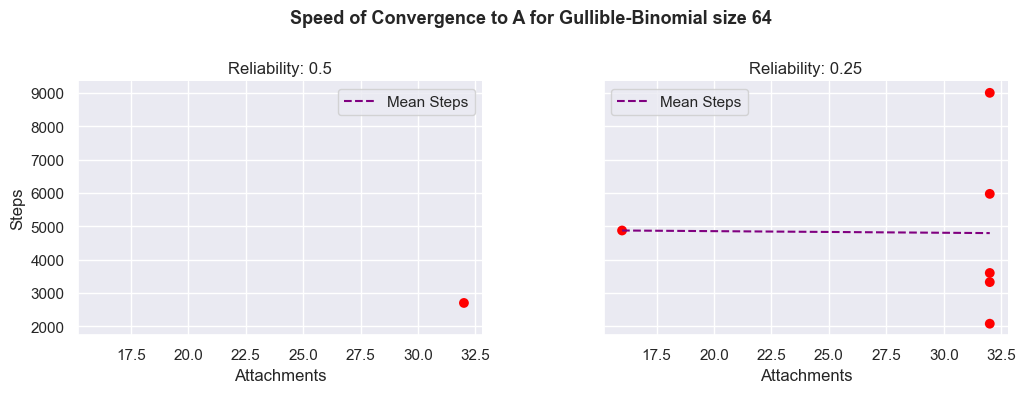

In [81]:
# Ensure reliability is sorted in descending order
reliability_order = gbin["reliability"].unique()
reliability_order = sorted(reliability_order, reverse=True)  # Sort reliability in descending order

# Set up the FacetGrid
sns.set()
g = sns.FacetGrid(
    data=gbin, 
    col="reliability",  # Create one subplot per unique value of reliability
    col_wrap=3,  # Number of columns in the grid (adjust as needed)
    sharex=True,  # Share the x-axis across plots
    sharey=True,
    height=4,
    aspect=1.3, 
    col_order=reliability_order
)

# Map the scatterplot to each FacetGrid subplot
g.map(sns.scatterplot, "network_barabasialbert_attachments", "steps", edgecolor='none', s=50, color='red')

# Loop through the axes in the FacetGrid and add mean lines
for ax in g.axes.flat:
    # Get the reliability value from the column title in the FacetGrid
    reliability_value = ax.get_title().split(" = ")[-1].strip()  # Extract reliability value
    
    # Filter the data for the current reliability value
    data = gbin[gbin["reliability"] == float(reliability_value)]  # Ensure it's the correct type (float or int)
    
    # Compute the mean of 'steps' for each value of 'network_barabasialbert_attachments'
    mean_steps = data.groupby("network_barabasialbert_attachments")["steps"].mean()
    
    # Plot the mean line
    ax.plot(mean_steps.index, mean_steps.values, color="purple", linestyle="--", label="Mean Steps")
    
    # Add the legend to each subplot
    ax.legend()

# Set axis labels and subplot titles
g.set_axis_labels("Attachments", "Steps")
g.set_titles(col_template="Reliability: {col_name}")
plt.subplots_adjust(top=0.80, hspace=0.3, wspace=0.3)

# Add a global title
g.fig.suptitle("Speed of Convergence to A for Gullible-Binomial size 64", weight="bold", fontsize=13, horizontalalignment='right')

# Show the plot
plt.show()


In [82]:
gneg = ba.query("op == 'UnreliableNetworkBasicGullibleNegativeEpsOp' and trials == 64 and epsilon == 0.001 and network_size == 64 and action == 'B'")

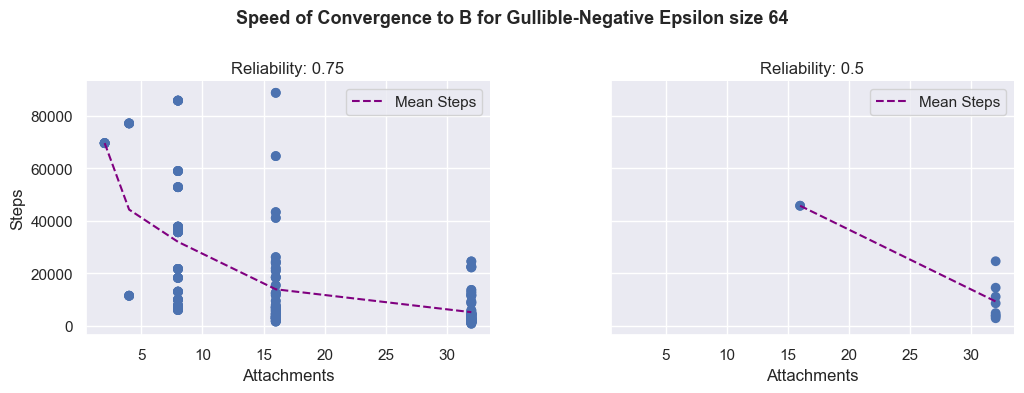

In [83]:
# Ensure reliability is sorted in descending order
reliability_order = gneg["reliability"].unique()
reliability_order = sorted(reliability_order, reverse=True)  # Sort reliability in descending order

# Set up the FacetGrid
sns.set()
g = sns.FacetGrid(
    data=gneg, 
    col="reliability",  # Create one subplot per unique value of reliability
    col_wrap=2,  # Number of columns in the grid (adjust as needed)
    sharex=True,  # Share the x-axis across plots
    sharey=True,
    height=4,
    aspect=1.3, 
    col_order=reliability_order
)

# Map the scatterplot to each FacetGrid subplot
g.map(sns.scatterplot, "network_barabasialbert_attachments", "steps", edgecolor='none', s=50)

# Loop through the axes in the FacetGrid and add mean lines
for ax in g.axes.flat:
    # Get the reliability value from the column title in the FacetGrid
    reliability_value = ax.get_title().split(" = ")[-1].strip()  # Extract reliability value
    
    # Filter the data for the current reliability value
    data = gneg[gneg["reliability"] == float(reliability_value)]  # Ensure it's the correct type (float or int)
    
    # Compute the mean of 'steps' for each value of 'network_barabasialbert_attachments'
    mean_steps = data.groupby("network_barabasialbert_attachments")["steps"].mean()
    
    # Plot the mean line
    ax.plot(mean_steps.index, mean_steps.values, color="purple", linestyle="--", label="Mean Steps")
    
    # Add the legend to each subplot
    ax.legend()

# Set axis labels and subplot titles
g.set_axis_labels("Attachments", "Steps")
g.set_titles(col_template="Reliability: {col_name}")
plt.subplots_adjust(top=0.80, hspace=0.3, wspace=0.3)

# Add a global title
g.fig.suptitle("Speed of Convergence to B for Gullible-Negative Epsilon size 64", weight="bold", fontsize=13)

# Show the plot
plt.show()


In [84]:
steps = gneg.groupby(['reliability','network_barabasialbert_attachments'])['steps'].agg(mean="mean", median="median")
steps

mean   median
reliability network_barabasialbert_attachments                    
0.50        16.0                                45775.000  45775.0
            32.0                                 9254.500   6686.5
0.75        2.0                                 69662.000  69662.0
            4.0                                 44316.000  44316.0
            8.0                                 32006.500  28676.5
            16.0                                13905.950   6773.0
            32.0                                 5172.125   3209.5

In [85]:
gneg = ba.query("op == 'UnreliableNetworkBasicGullibleNegativeEpsOp' and trials == 64 and epsilon == 0.001 and network_size == 64 and action == 'A'")

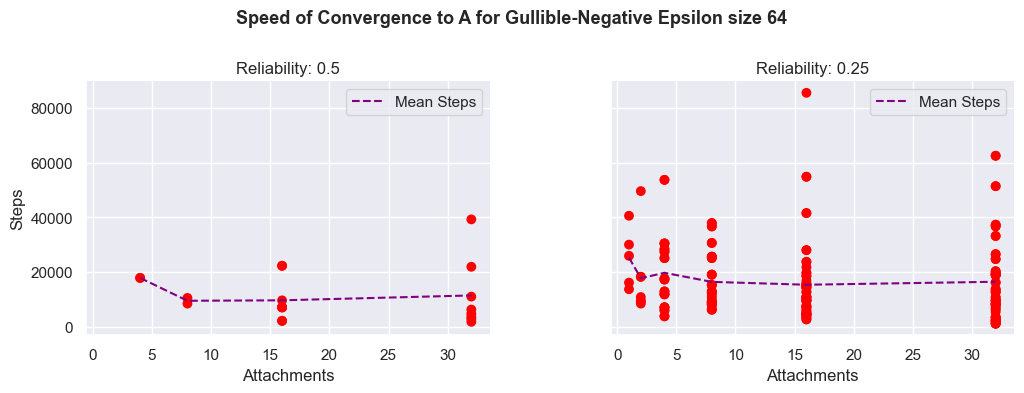

In [91]:
# Ensure reliability is sorted in descending order
reliability_order = gneg["reliability"].unique()
reliability_order = sorted(reliability_order, reverse=True)  # Sort reliability in descending order

# Set up the FacetGrid
sns.set()
g = sns.FacetGrid(
    data=gneg, 
    col="reliability",  # Create one subplot per unique value of reliability
    col_wrap=2,  # Number of columns in the grid (adjust as needed)
    sharex=True,  # Share the x-axis across plots
    sharey=True,
    height=4,
    aspect=1.3, 
    col_order=reliability_order
)

# Map the scatterplot to each FacetGrid subplot
g.map(sns.scatterplot, "network_barabasialbert_attachments", "steps", edgecolor='none', s=50, color='red')

# Loop through the axes in the FacetGrid and add mean lines
for ax in g.axes.flat:
    # Get the reliability value from the column title in the FacetGrid
    reliability_value = ax.get_title().split(" = ")[-1].strip()  # Extract reliability value
    
    # Filter the data for the current reliability value
    data = gneg[gneg["reliability"] == float(reliability_value)]  # Ensure it's the correct type (float or int)
    
    # Compute the mean of 'steps' for each value of 'network_barabasialbert_attachments'
    mean_steps = data.groupby("network_barabasialbert_attachments")["steps"].mean()
    
    # Plot the mean line
    ax.plot(mean_steps.index, mean_steps.values, color="purple", linestyle="--", label="Mean Steps")
    
    # Add the legend to each subplot
    ax.legend()

# Set axis labels and subplot titles
g.set_axis_labels("Attachments", "Steps")
g.set_titles(col_template="Reliability: {col_name}")
plt.subplots_adjust(top=0.80, hspace=0.3, wspace=0.3)

# Add a global title
g.fig.suptitle("Speed of Convergence to A for Gullible-Negative Epsilon size 64", weight="bold", fontsize=13)

# Show the plot
plt.show()

In [92]:
albin = ba.query("op == 'UnreliableNetworkModifiedAlignedBinomialOp' and trials == 64 and epsilon == 0.001 and network_size == 64 and action == 'B'")

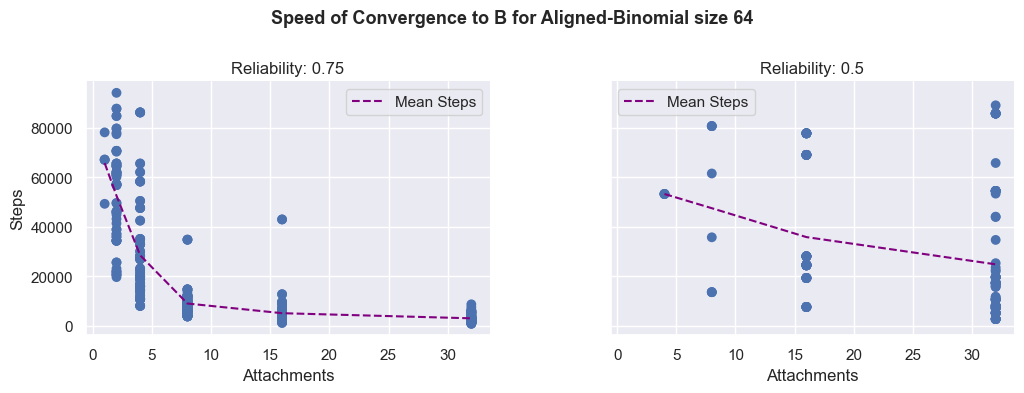

In [115]:
# Ensure reliability is sorted in descending orderreliability_order = albin["reliability"].unique()
reliability_order = sorted(reliability_order, reverse=True)  # Sort reliability in descending order

# Set up the FacetGrid
sns.set()
g = sns.FacetGrid(
    data=albin, 
    col="reliability",  # Create one subplot per unique value of reliability
    col_wrap=2,  # Number of columns in the grid (adjust as needed)
    sharex=True,  # Share the x-axis across plots
    sharey=True,
    height=4,
    aspect=1.3, 
    col_order=reliability_order
)

# Map the scatterplot to each FacetGrid subplot
g.map(sns.scatterplot, "network_barabasialbert_attachments", "steps", edgecolor='none', s=50)

# Loop through the axes in the FacetGrid and add mean lines
for ax in g.axes.flat:
    # Get the reliability value from the column title in the FacetGrid
    reliability_value = ax.get_title().split(" = ")[-1].strip()  # Extract reliability value
    
    # Filter the data for the current reliability value
    data = albin[albin["reliability"] == float(reliability_value)]  # Ensure it's the correct type (float or int)
    
    # Compute the mean of 'steps' for each value of 'network_barabasialbert_attachments'
    mean_steps = data.groupby("network_barabasialbert_attachments")["steps"].mean()
    
    # Plot the mean line
    ax.plot(mean_steps.index, mean_steps.values, color="purple", linestyle="--", label="Mean Steps")
    
    # Add the legend to each subplot
    ax.legend()

# Set axis labels and subplot titles
g.set_axis_labels("Attachments", "Steps")
g.set_titles(col_template="Reliability: {col_name}")
plt.subplots_adjust(top=0.80, hspace=0.3, wspace=0.3)

# Add a global title
g.fig.suptitle("Speed of Convergence to B for Aligned-Binomial size 64", weight="bold", fontsize=13)

# Show the plot
plt.show()

In [117]:
steps = albin.groupby(['reliability','network_barabasialbert_attachments'])['steps'].agg(mean="mean", median="median")
steps

mean   median
reliability network_barabasialbert_attachments                       
0.50        4.0                                 53306.000000  53306.0
            8.0                                 47575.000000  48706.0
            16.0                                35903.000000  24679.0
            32.0                                24909.012346  16163.0
0.75        1.0                                 65790.000000  67199.0
            2.0                                 52614.584615  56895.0
            4.0                                 28560.977778  20054.0
            8.0                                  9081.400000   8137.0
            16.0                                 5179.350000   3785.0
            32.0                                 3106.530000   2837.0

In [123]:
alneg = ba.query("op == 'UnreliableNetworkModifiedAlignedNegativeEpsOp' and trials == 64 and epsilon == 0.001 and network_size == 64 and action == 'B' and reliability == 0.75")

Text(0.5, 1.0, 'Speed of convergence to B for Aligned-Negative Epsilon size 64')

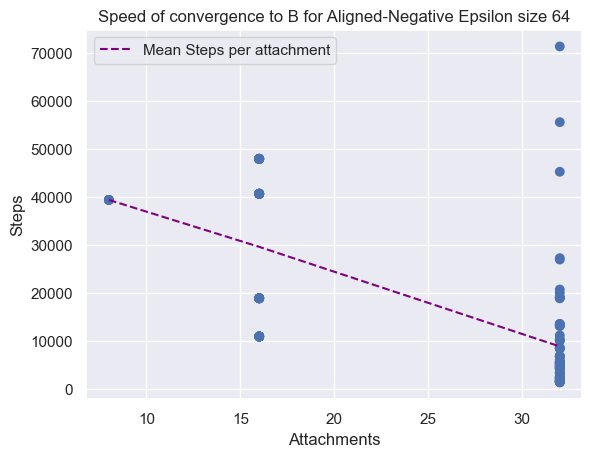

In [129]:
sns.set()
mean_steps = alneg.groupby('network_barabasialbert_attachments')['steps'].mean()
sns.scatterplot(data = alneg, x = 'network_barabasialbert_attachments', y = 'steps', edgecolor = 'none', s = 50)
# Add the mean line per group
plt.plot(mean_steps.index, mean_steps.values, color='purple', linestyle='--', label='Mean Steps per attachment')
plt.xlabel("Attachments", fontsize=12)  
plt.ylabel("Steps", fontsize=12) 
plt.legend() 
plt.title(f"Speed of convergence to B for Aligned-Negative Epsilon size 64")

B) SIZE 32 NETWORKS

In [97]:
bg = ba.query("op == 'BalaGoyalOp' and epsilon == 0.001 and network_size == 32 and action == 'B'").reset_index()

Text(0.5, 1.0, 'Speed of convergence to B for BalaGoyal size 32')

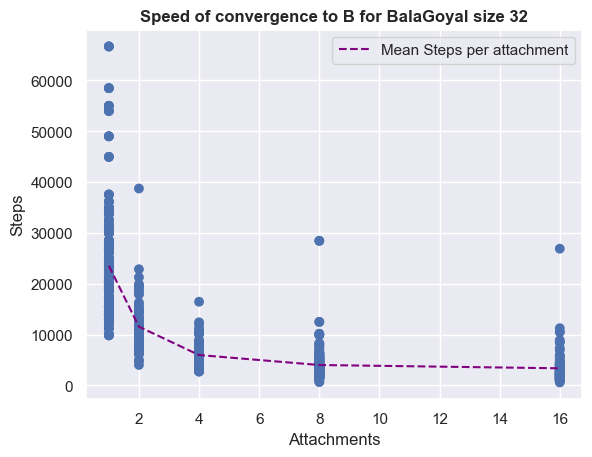

In [99]:
sns.set()
mean_steps = bg.groupby('network_barabasialbert_attachments')['steps'].mean()
sns.scatterplot(data = bg, x = 'network_barabasialbert_attachments', y = 'steps', edgecolor = 'none', s = 50)
# Add the mean line per group
plt.plot(mean_steps.index, mean_steps.values, color='purple', linestyle='--', label='Mean Steps per attachment')
plt.xlabel("Attachments", fontsize=12)  
plt.ylabel("Steps", fontsize=12) 
plt.legend() 
plt.title(f"Speed of convergence to B for BalaGoyal size 32", weight="bold")

In [143]:
gbin = ba.query("op == 'UnreliableNetworkBasicGullibleBinomialOp' and trials == 64 and epsilon == 0.001 and network_size == 32 and action != 'A'")

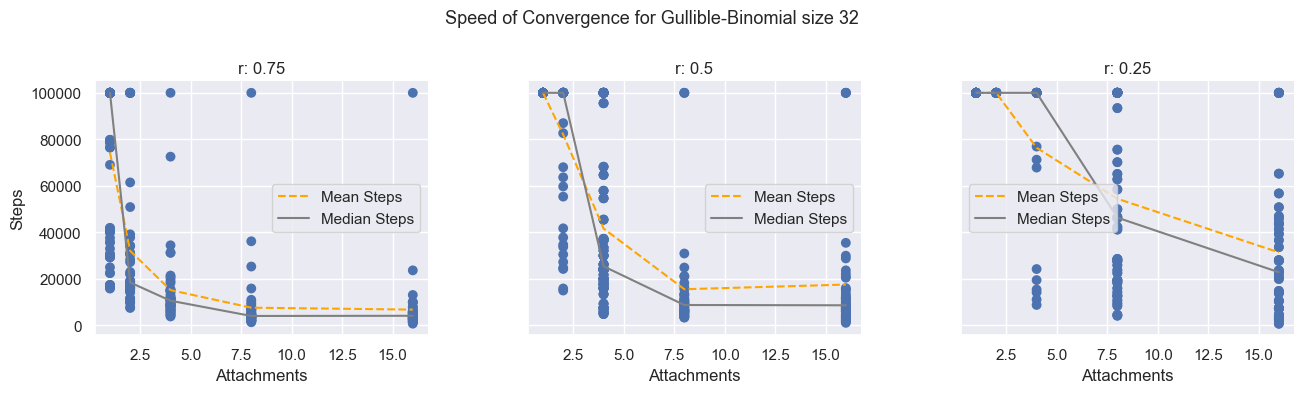

In [233]:
# Ensure reliability is sorted in descending order
reliability_order = gbin["reliability"].unique()
reliability_order = sorted(reliability_order, reverse=True)

# Set up the FacetGrid
sns.set()
g = sns.FacetGrid(
    data=gbin, 
    col="reliability", 
    col_wrap=3, 
    sharex=True, 
    sharey=True, 
    height=4, 
    aspect=1.1, 
    col_order=reliability_order
)

# Map the scatterplot to each FacetGrid subplot
g.map(sns.scatterplot, "network_barabasialbert_attachments", "steps", edgecolor='none', s=50)

# Loop through the axes in the FacetGrid and add mean and median lines
for ax in g.axes.flat:
    # Get the reliability value from the column title in the FacetGrid
    reliability_value = ax.get_title().split(" = ")[-1].strip()  
    
    # Filter the data for the current reliability value
    data = gbin[gbin["reliability"] == float(reliability_value)]  
    
    # Compute the mean and median of 'steps' for each value of 'network_barabasialbert_attachments'
    mean_steps = data.groupby("network_barabasialbert_attachments")["steps"].mean()
    median_steps = data.groupby("network_barabasialbert_attachments")["steps"].median()
    
    # Plot the mean line (dashed purple)
    ax.plot(mean_steps.index, mean_steps.values, color="orange", linestyle="--", label="Mean Steps")
    
    # Plot the median line (solid green)
    ax.plot(median_steps.index, median_steps.values, color="grey", linestyle="-", label="Median Steps")

    # Add the legend
    ax.legend()

# Set axis labels and subplot titles
g.set_axis_labels("Attachments", "Steps")
g.set_titles(col_template="r: {col_name}")
plt.subplots_adjust(top=0.80, hspace=0.3, wspace=0.3)
# Add a global title
g.fig.suptitle("Speed of Convergence for Gullible-Binomial size 32", fontsize=13)
# Show the plot
plt.show()



In [104]:
c_gbin = ba.query("op == 'UnreliableNetworkBasicGullibleBinomialOp' and trials == 64 and epsilon == 0.001 and network_size == 32 and action != 'A'")
# Group by reliability and network_barabasialbert_attachments, then calculate mean and median
steps = c_gbin.groupby(['reliability', 'network_barabasialbert_attachments'])['steps'].agg(
    mean='mean', 
    median=lambda x: np.median(x)  # Use np.median() to avoid issues with interpolation
).reset_index()
steps

,reliability,network_barabasialbert_attachments,mean,median
0,0.25,1.0,100000.000000,100000.0
1,0.25,2.0,100000.000000,100000.0
2,0.25,4.0,76365.360000,NaN
3,0.25,8.0,54451.782609,46333.0
4,0.25,16.0,31384.214286,22845.0
5,0.50,1.0,100000.000000,100000.0
6,0.50,2.0,82036.900000,100000.0
7,0.50,4.0,41652.700000,25392.0
8,0.50,8.0,15538.936170,8755.0
9,0.50,16.0,17536.700000,8631.0


In [105]:
gbin = ba.query("op == 'UnreliableNetworkBasicGullibleBinomialOp' and trials == 64 and epsilon == 0.001 and network_size == 32 and action == 'A'")

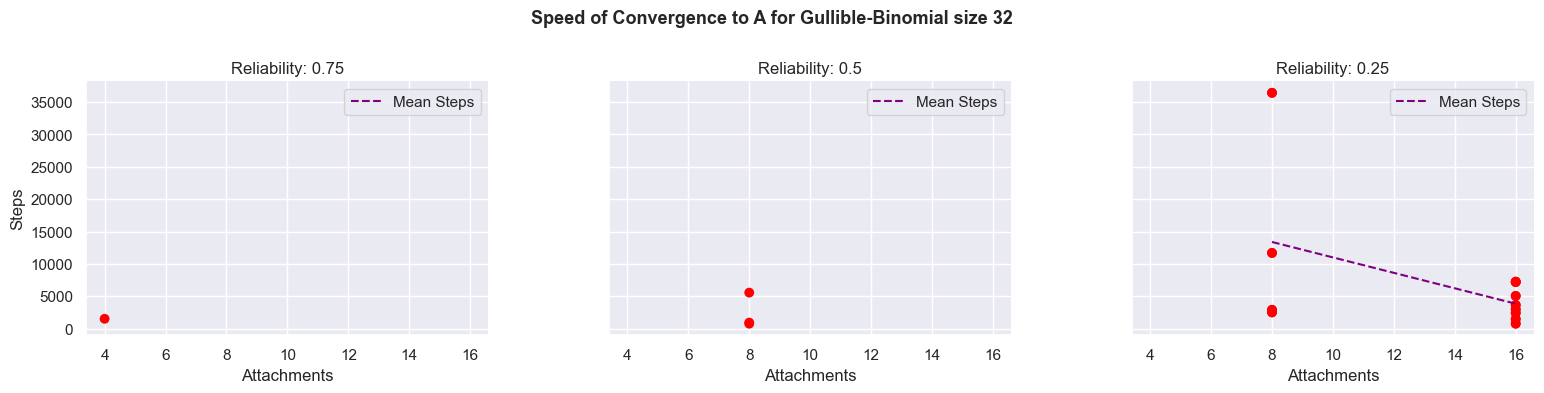

In [102]:
# Ensure reliability is sorted in descending order
reliability_order = gbin["reliability"].unique()
reliability_order = sorted(reliability_order, reverse=True)  # Sort reliability in descending order

# Set up the FacetGrid
sns.set()
g = sns.FacetGrid(
    data=gbin, 
    col="reliability",  # Create one subplot per unique value of reliability
    col_wrap=3,  # Number of columns in the grid (adjust as needed)
    sharex=True,  # Share the x-axis across plots
    sharey=True,
    height=4,
    aspect=1.3, 
    col_order=reliability_order
)

# Map the scatterplot to each FacetGrid subplot
g.map(sns.scatterplot, "network_barabasialbert_attachments", "steps", edgecolor='none', s=50, color='red')

# Loop through the axes in the FacetGrid and add mean lines
for ax in g.axes.flat:
    # Get the reliability value from the column title in the FacetGrid
    reliability_value = ax.get_title().split(" = ")[-1].strip()  # Extract reliability value
    
    # Filter the data for the current reliability value
    data = gbin[gbin["reliability"] == float(reliability_value)]  # Ensure it's the correct type (float or int)
    
    # Compute the mean of 'steps' for each value of 'network_barabasialbert_attachments'
    mean_steps = data.groupby("network_barabasialbert_attachments")["steps"].mean()
    
    # Plot the mean line
    ax.plot(mean_steps.index, mean_steps.values, color="purple", linestyle="--", label="Mean Steps")
    
    # Add the legend to each subplot
    ax.legend()

# Set axis labels and subplot titles
g.set_axis_labels("Attachments", "Steps")
g.set_titles(col_template="Reliability: {col_name}")
plt.subplots_adjust(top=0.80, hspace=0.3, wspace=0.3)

# Add a global title
g.fig.suptitle("Speed of Convergence to A for Gullible-Binomial size 32", weight="bold", fontsize=13)

# Show the plot
plt.show()


In [103]:
gneg = ba.query("op == 'UnreliableNetworkBasicGullibleNegativeEpsOp' and trials == 64 and epsilon == 0.001 and network_size == 32 and action == 'B'")

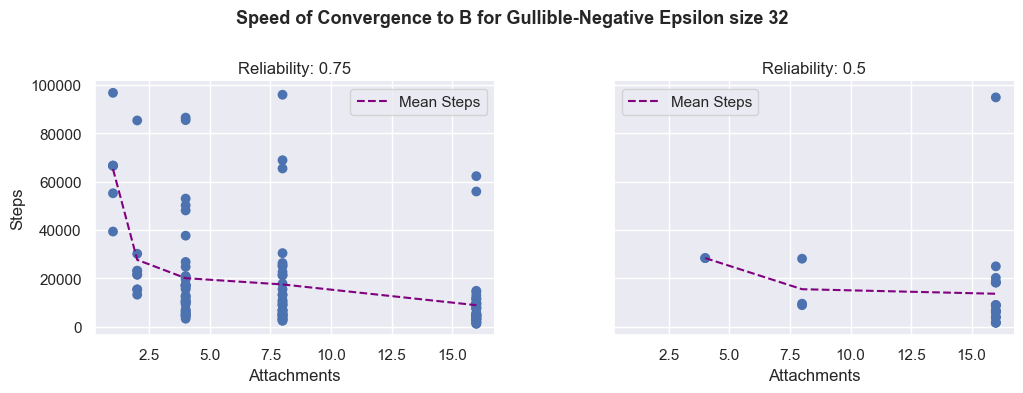

In [104]:
# Ensure reliability is sorted in descending order
reliability_order = gneg["reliability"].unique()
reliability_order = sorted(reliability_order, reverse=True)  # Sort reliability in descending order

# Set up the FacetGrid
sns.set()
g = sns.FacetGrid(
    data=gneg, 
    col="reliability",  # Create one subplot per unique value of reliability
    col_wrap=2,  # Number of columns in the grid (adjust as needed)
    sharex=True,  # Share the x-axis across plots
    sharey=True,
    height=4,
    aspect=1.3, 
    col_order=reliability_order
)

# Map the scatterplot to each FacetGrid subplot
g.map(sns.scatterplot, "network_barabasialbert_attachments", "steps", edgecolor='none', s=50)

# Loop through the axes in the FacetGrid and add mean lines
for ax in g.axes.flat:
    # Get the reliability value from the column title in the FacetGrid
    reliability_value = ax.get_title().split(" = ")[-1].strip()  # Extract reliability value
    
    # Filter the data for the current reliability value
    data = gneg[gneg["reliability"] == float(reliability_value)]  # Ensure it's the correct type (float or int)
    
    # Compute the mean of 'steps' for each value of 'network_barabasialbert_attachments'
    mean_steps = data.groupby("network_barabasialbert_attachments")["steps"].mean()
    
    # Plot the mean line
    ax.plot(mean_steps.index, mean_steps.values, color="purple", linestyle="--", label="Mean Steps")
    
    # Add the legend to each subplot
    ax.legend()

# Set axis labels and subplot titles
g.set_axis_labels("Attachments", "Steps")
g.set_titles(col_template="Reliability: {col_name}")
plt.subplots_adjust(top=0.80, hspace=0.3, wspace=0.3)

# Add a global title
g.fig.suptitle("Speed of Convergence to B for Gullible-Negative Epsilon size 32", weight="bold", fontsize=13)

# Show the plot
plt.show()


In [107]:
gneg = ba.query("op == 'UnreliableNetworkBasicGullibleNegativeEpsOp' and trials == 64 and epsilon == 0.001 and network_size == 32 and action == 'A'")

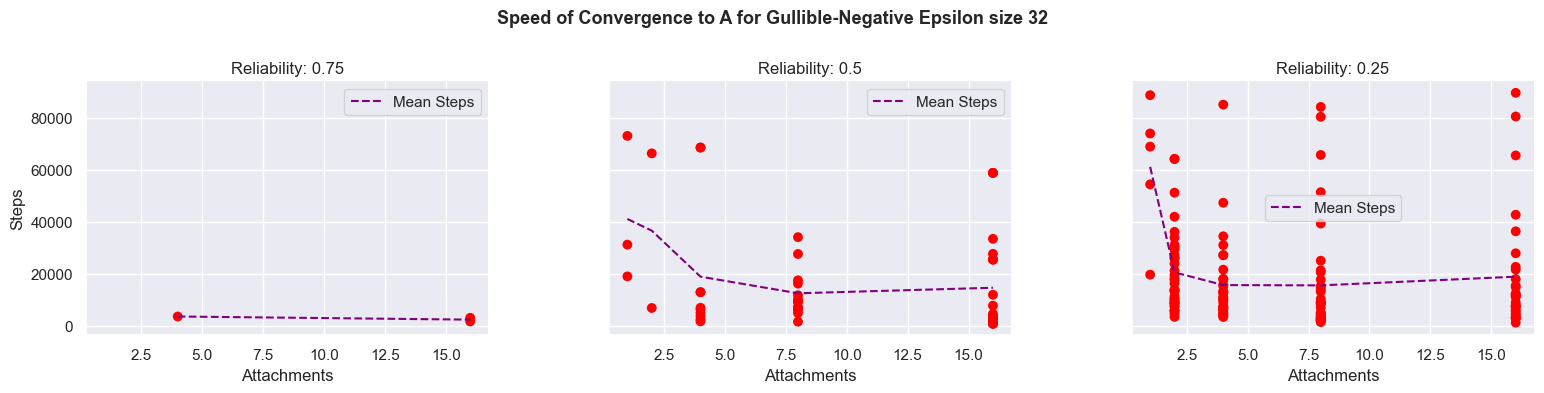

In [111]:
# Ensure reliability is sorted in descending order
reliability_order = gneg["reliability"].unique()
reliability_order = sorted(reliability_order, reverse=True)  # Sort reliability in descending order

# Set up the FacetGrid
sns.set()
g = sns.FacetGrid(
    data=gneg, 
    col="reliability",  # Create one subplot per unique value of reliability
    col_wrap=3,  # Number of columns in the grid (adjust as needed)
    sharex=True,  # Share the x-axis across plots
    sharey=True,
    height=4,
    aspect=1.3, 
    col_order=reliability_order
)

# Map the scatterplot to each FacetGrid subplot
g.map(sns.scatterplot, "network_barabasialbert_attachments", "steps", edgecolor='none', s=50, color='red')

# Loop through the axes in the FacetGrid and add mean lines
for ax in g.axes.flat:
    # Get the reliability value from the column title in the FacetGrid
    reliability_value = ax.get_title().split(" = ")[-1].strip()  # Extract reliability value
    
    # Filter the data for the current reliability value
    data = gneg[gneg["reliability"] == float(reliability_value)]  # Ensure it's the correct type (float or int)
    
    # Compute the mean of 'steps' for each value of 'network_barabasialbert_attachments'
    mean_steps = data.groupby("network_barabasialbert_attachments")["steps"].mean()
    
    # Plot the mean line
    ax.plot(mean_steps.index, mean_steps.values, color="purple", linestyle="--", label="Mean Steps")
    
    # Add the legend to each subplot
    ax.legend()

# Set axis labels and subplot titles
g.set_axis_labels("Attachments", "Steps")
g.set_titles(col_template="Reliability: {col_name}")
plt.subplots_adjust(top=0.80, hspace=0.3, wspace=0.3)

# Add a global title
g.fig.suptitle("Speed of Convergence to A for Gullible-Negative Epsilon size 32", weight="bold", fontsize=13)

# Show the plot
plt.show()

## Mann-Whitney - Steps

**A) Comparing BalaGoyal with Unreliable models**

In [15]:
df = ba.query("action == 'B'") #filtering by action

In [25]:
data = df.query(
    "(network_kind == 'barabasialbert') and " 
    "(epsilon == 0.001) and "
    "(trials == 64) and"
    "(network_size == 64) and"
    "(op == 'UnreliableNetworkBasicGullibleNegativeEpsOp' or op == 'UnreliableNetworkModifiedAlignedNegativeEpsOp')"
)

In [27]:
# DataFrame to store results for different reliability comparisons
reliability_results = pd.DataFrame()

# List of operations to compare
operations = data['op'].unique()

# Iterate over operations
for idx, op in enumerate(operations):
    # Filter data for the current operation
    op_data = data.query("op == @op").copy()

    # Iterate over grouped attributes
    for (kind, size, epsilon, attachments), group in op_data.groupby(
        ['network_kind', 'network_size', 'epsilon', 'network_barabasialbert_attachments']
    ):
        op1_steps = group["steps"]

        # Compare with other operations
        for compared_op in operations[idx + 1:]:
            # Filtering based on multiple conditions using .loc for clarity
            compared_group = data.loc[
                (data['op'] == compared_op) &
                (data['network_kind'] == kind) &
                (data['network_size'] == size) &
                (data['epsilon'] == epsilon) &
                (data['network_barabasialbert_attachments'] == attachments)
            ]

            op2_steps = compared_group["steps"]

            if not op1_steps.empty and not op2_steps.empty:
                # Calculate Mann Whitney U Test between the two reliabilities
                stat, pvalue = stats.mannwhitneyu(op1_steps, op2_steps)

                _ = pd.DataFrame(
                    {
                        'Op': [op],
                        'Kind': [kind],
                        'Size': [size],
                        'Epsilon': [epsilon],
                        'Attachments': [attachments],
                        "Mean_steps": [np.mean(op1_steps)],
                        'Compared_op': [compared_op],
                        "Compared_mean_steps": [np.mean(op2_steps)],
                        "stat": [stat],
                        "pvalue": [pvalue],
                    }
                )

                # Append to results DataFrame for reliability comparisons
                reliability_results = pd.concat([reliability_results, _], ignore_index=True)



In [29]:
reliability_results

,Op,Kind,Size,Epsilon,Attachments,Mean_steps,Compared_op,Compared_mean_steps,stat,pvalue
0,UnreliableNetworkBasicGullibleNegativeEpsOp,barabasialbert,64.0,0.001,8.0,32006.500000,UnreliableNetworkModifiedAlignedNegativeEpsOp,39401.000000,60.0,9.792937e-02
1,UnreliableNetworkBasicGullibleNegativeEpsOp,barabasialbert,64.0,0.001,16.0,14683.243902,UnreliableNetworkModifiedAlignedNegativeEpsOp,29620.500000,924.0,2.531620e-09
2,UnreliableNetworkBasicGullibleNegativeEpsOp,barabasialbert,64.0,0.001,32.0,5486.153846,UnreliableNetworkModifiedAlignedNegativeEpsOp,8855.463415,3110.0,1.554126e-03


In [159]:
file_path = "/Users/fi3502phd/Desktop"
reliability_results.to_csv(f"{file_path}/steps.csv", index=False)

**B) Comparing within the same model, different reliabilities**

In [68]:
filtered_df = df.query(
    "(network_kind == 'barabasialbert') and " 
    "op =='UnreliableNetworkModifiedAlignedNegativeEpsOp') and"
    "(epsilon == 0.001) and "
    "(trials == 64) and"
    "(network_size == 32)"
)

NameError: name 'df' is not defined

In [ ]:
# DataFrame to store results for different reliability comparisons
reliability_results = pd.DataFrame()

# List of operations to compare
reliability = filtered_df['reliability'].unique()

# Iterate over operations
for idx, rel in enumerate(reliability):
    # Filter data for the current operation
    rel_data = filtered_df[filtered_df['reliability'] == rel]



    # Iterate over grouped attributes
    for (op, kind, size, epsilon, attachments), group in rel_data.groupby(
        ['op','network_kind', 'network_size', 'epsilon', 'network_barabasialbert_attachments']
    ):
        rel1_steps = group["steps"]

        # Compare with other rel
        for compared_rel in reliability[idx + 1:]:
            # Filtering based on multiple conditions using .loc for clarity
            compared_group = filtered_df.loc[
                (filtered_df['reliability'] == compared_rel) &
                (filtered_df['network_kind'] == kind) &
                (filtered_df['network_size'] == size) &
                (filtered_df['epsilon'] == epsilon) &
                (filtered_df['network_barabasialbert_attachments'] == attachments)
                ]

            rel2_steps = compared_group["steps"]

    

            if not rel1_steps.empty and not rel2_steps.empty:
                # Calculate Mann Whitney U Test between the two reliabilities
                stat, pvalue = stats.mannwhitneyu(rel1_steps, rel2_steps)

                _ = pd.DataFrame(
                    {
                        'Reliability': [rel],
                        'Op': [op],
                        'Kind': [kind],
                        'Size': [size],
                        'Epsilon': [epsilon],
                        'Attachments': [attachments],
                        "Mean_steps": [np.mean(rel1_steps)],
                        'Compared_rel': [compared_rel],
                        "Compared_mean_steps": [np.mean(rel2_steps)],
                        "stat": [stat],
                        "pvalue": [pvalue],
                    }
                )

                # Append to results DataFrame for reliability comparisons
                reliability_results = pd.concat([reliability_results, _], ignore_index=True)

In [71]:
reliability_results

NameError: name 'reliability_results' is not defined

In [133]:
file_path = "/Users/fi3502phd/Desktop"
reliability_results.to_csv(f"{file_path}/steps.csv", index=False)

**C) Comparing, within the same model, connectivity**

In [154]:
filtered_df = df.query(
    "(network_kind == 'barabasialbert') and " 
        "(op == 'BalaGoyalOp') and"
    "(epsilon == 0.001) and "
    "(trials == 64) and"
    "(network_size == 64) and"
    "(reliability == 1)"
)

In [156]:
# DataFrame to store results for different reliability comparisons
connectivity_results = pd.DataFrame()

# List of operations to compare
attachments = filtered_df['network_barabasialbert_attachments'].unique()

# Iterate over operations
for idx, att in enumerate(attachments):
    # Filter data for the current operation
    att_data = filtered_df[filtered_df['network_barabasialbert_attachments'] == att]


    # Iterate over grouped attributes
    for (op, kind, size, epsilon), group in att_data.groupby(
        ['op','network_kind', 'network_size', 'epsilon']
    ):
        att1_steps = group['steps']

        # Compare with other rel
        for compared_att in attachments[idx + 1:]:
            # Filtering based on multiple conditions using .loc for clarity
            compared_group = filtered_df.loc[
                (filtered_df['network_barabasialbert_attachments'] == compared_att) &
                (filtered_df['op'] == op) &
                (filtered_df['network_kind'] == kind) &
                (filtered_df['network_size'] == size) &
                (filtered_df['epsilon'] == epsilon)
                ]

            att2_steps = compared_group['steps']

    

            if not att1_steps.empty and not att2_steps.empty:
                # Calculate Mann Whitney U Test between the two reliabilities
                stat, pvalue = stats.mannwhitneyu(att1_steps, att2_steps)

                _ = pd.DataFrame(
                    {
                        'Attachments': [att],
                        'Op': [op],
                        'Kind': [kind],
                        'Size': [size],
                        'Epsilon': [epsilon],
                        "Mean_steps": [np.mean(att1_steps)],
                        'Compared_att': [compared_att],
                        "Compared_mean_steps": [np.mean(att2_steps)],
                        "stat": [stat],
                        "pvalue": [pvalue],
                    }
                )

                # Append to results DataFrame for reliability comparisons
                connectivity_results = pd.concat([connectivity_results, _], ignore_index=True)

In [158]:
connectivity_results

,Attachments,Op,Kind,Size,Epsilon,Mean_steps,Compared_att,Compared_mean_steps,stat,pvalue
0,8.0,BalaGoyalOp,barabasialbert,64.0,0.001,3677.400000,4.0,6491.944444,736.0,2.544389e-21
1,8.0,BalaGoyalOp,barabasialbert,64.0,0.001,3677.400000,16.0,1881.355556,7258.0,4.445908e-20
2,8.0,BalaGoyalOp,barabasialbert,64.0,0.001,3677.400000,32.0,1568.044444,7643.0,8.859680e-25
3,8.0,BalaGoyalOp,barabasialbert,64.0,0.001,3677.400000,2.0,13423.290323,92.0,3.181970e-30
4,8.0,BalaGoyalOp,barabasialbert,64.0,0.001,3677.400000,1.0,30218.244444,2.0,5.224401e-31
5,4.0,BalaGoyalOp,barabasialbert,64.0,0.001,6491.944444,16.0,1881.355556,8026.0,5.624142e-30
6,4.0,BalaGoyalOp,barabasialbert,64.0,0.001,6491.944444,32.0,1568.044444,8030.0,4.946427e-30
7,4.0,BalaGoyalOp,barabasialbert,64.0,0.001,6491.944444,2.0,13423.290323,265.0,7.334542e-28
8,4.0,BalaGoyalOp,barabasialbert,64.0,0.001,6491.944444,1.0,30218.244444,0.0,4.873764e-31
9,16.0,BalaGoyalOp,barabasialbert,64.0,0.001,1881.355556,32.0,1568.044444,5107.0,2.505663e-03


In [160]:
file_path = "/Users/fi3502phd/Desktop"
connectivity_results.to_csv(f"{file_path}/steps.csv", index=False)